## In this notebook, we will train a convolutional neural network to segment our satellite images.  We will first use our raw images, and then compare with extra features from previous engineering, such as as dsm with tophat filtering and nvdi.  Once as benchmark is set, we will look into hyperparameter optimization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing.preprocessor import Preprocess     #  From usatellite
from models.unet2d.unet2d_model import Unet2d

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras import backend as K

from tensorflow.keras.optimizers import Adam
from loss.loss_metrics import Loss

## First we will load our data.  

In [2]:
imgs_array = np.load('/Users/cody/Python/usattelite_data/img_array.npy')

In [3]:
dsm_array = np.load('/Users/cody/Python/usattelite_data/dsm_array.npy')

In [4]:
nvdi_array = np.load('/Users/cody/Python/usattelite_data/veggies_array.npy')

In [5]:
label_array = np.load('/Users/cody/Python/usattelite_data/label_array.npy')

Let's just start with our images as input to the network to provide a benchmark...  Later we will create more complex data structures, which contain more than just rgb.  These data will add the dsm and/or nvdi images as extra channels.

Let's scale our data, since that is typically helpful for machine learning.

In [6]:
preproc = Preprocess()

In [7]:
imgs_array_scaled = preproc.unit_normalize_dims(imgs_array)

I'm actually going to just use sklearn's train test split to split up the data into traing and test data - there's really no reason to write our own code for this.  We will also shuffle the data and set a random state so it's reproducible.

In [8]:
x_train, x_val, y_train, y_val = train_test_split(imgs_array, label_array, test_size=0.30, shuffle=True, random_state=42)

In [9]:
unet2dmodel = Unet2d(input_img=imgs_array)

In [10]:
unet2dmodel_obj = unet2dmodel.get_unet()

In [11]:
unet2dmodel_obj.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["categorical_accuracy", Loss.f1])

In [12]:
results = unet2dmodel_obj.fit(x_train, y_train, batch_size=1, epochs=100, callbacks=unet2dmodel.callback_list(),
                   validation_data=(x_val, y_val))

Epoch 1/100
23/23 [==============================] - ETA: 0s - loss: 1.4510 - categorical_accuracy: 0.5178 - f1: 0.4501
Epoch 00001: val_loss improved from inf to 9.61993, saving model to model-test-5.h5
23/23 [==============================] - 180s 8s/step - loss: 1.4510 - categorical_accuracy: 0.5178 - f1: 0.4501 - val_loss: 9.6199 - val_categorical_accuracy: 0.2750 - val_f1: 0.1938
Epoch 2/100
23/23 [==============================] - ETA: 0s - loss: 1.2252 - categorical_accuracy: 0.6603 - f1: 0.5341
Epoch 00002: val_loss did not improve from 9.61993
23/23 [==============================] - 170s 7s/step - loss: 1.2252 - categorical_accuracy: 0.6603 - f1: 0.5341 - val_loss: 11.7379 - val_categorical_accuracy: 0.2616 - val_f1: 0.1741
Epoch 3/100
23/23 [==============================] - ETA: 0s - loss: 1.0998 - categorical_accuracy: 0.6982 - f1: 0.5974
Epoch 00003: val_loss improved from 9.61993 to 8.71826, saving model to model-test-5.h5
23/23 [==============================] - 177s 8s

Epoch 23/100
23/23 [==============================] - ETA: 0s - loss: 0.4219 - categorical_accuracy: 0.8451 - f1: 0.8391
Epoch 00023: val_loss improved from 0.57360 to 0.55104, saving model to model-test-5.h5
23/23 [==============================] - 171s 7s/step - loss: 0.4219 - categorical_accuracy: 0.8451 - f1: 0.8391 - val_loss: 0.5510 - val_categorical_accuracy: 0.7990 - val_f1: 0.7952
Epoch 24/100
23/23 [==============================] - ETA: 0s - loss: 0.4088 - categorical_accuracy: 0.8498 - f1: 0.8437
Epoch 00024: val_loss improved from 0.55104 to 0.52864, saving model to model-test-5.h5
23/23 [==============================] - 175s 8s/step - loss: 0.4088 - categorical_accuracy: 0.8498 - f1: 0.8437 - val_loss: 0.5286 - val_categorical_accuracy: 0.8091 - val_f1: 0.8039
Epoch 25/100
23/23 [==============================] - ETA: 0s - loss: 0.4031 - categorical_accuracy: 0.8521 - f1: 0.8466
Epoch 00025: val_loss improved from 0.52864 to 0.52833, saving model to model-test-5.h5
23/23

23/23 [==============================] - ETA: 0s - loss: 0.3455 - categorical_accuracy: 0.8749 - f1: 0.8664
Epoch 00045: val_loss did not improve from 0.52279
23/23 [==============================] - 176s 8s/step - loss: 0.3455 - categorical_accuracy: 0.8749 - f1: 0.8664 - val_loss: 0.5248 - val_categorical_accuracy: 0.8151 - val_f1: 0.8124
Epoch 46/100
23/23 [==============================] - ETA: 0s - loss: 0.3449 - categorical_accuracy: 0.8752 - f1: 0.8667
Epoch 00046: val_loss did not improve from 0.52279
23/23 [==============================] - 174s 8s/step - loss: 0.3449 - categorical_accuracy: 0.8752 - f1: 0.8667 - val_loss: 0.5239 - val_categorical_accuracy: 0.8157 - val_f1: 0.8133
Epoch 47/100
23/23 [==============================] - ETA: 0s - loss: 0.3445 - categorical_accuracy: 0.8754 - f1: 0.8669
Epoch 00047: val_loss did not improve from 0.52279
23/23 [==============================] - 180s 8s/step - loss: 0.3445 - categorical_accuracy: 0.8754 - f1: 0.8669 - val_loss: 0.52

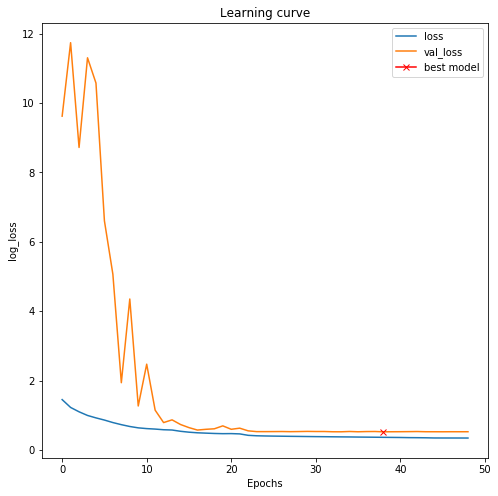

In [14]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [15]:
x_val.shape

(10, 512, 512, 3)

In [16]:
test_imgs = unet2dmodel_obj.predict(x_val)

In [20]:
test_classes = np.argmax(test_imgs, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


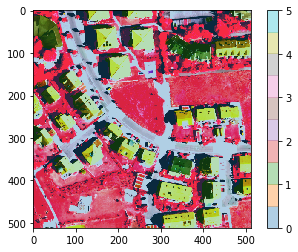

In [52]:
ind = np.random.randint(len(x_val))

plt.imshow(x_val[ind], cmap='gray')
plt.imshow(test_classes[ind], cmap='tab10', alpha=0.35)
plt.colorbar()
plt.show()